In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import os

In [2]:
#read in the csv file
file_path = os.path.join("Life_Expectancy_Data.csv")
life_df = pd.read_csv(file_path)

life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
#trim the dataframe to the columns that we need
life_df = life_df[["Country", "Year", "Status", "Life expectancy ", "Adult Mortality", "Alcohol", 
                   "percentage expenditure", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure",
                  "Diphtheria ", " HIV/AIDS", "GDP", "Population", "Schooling"]]
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5


In [5]:
life_df = life_df.rename(columns={'Life expectancy ': 'Life Expectancy', 
                        'percentage expenditure': 'Percentage Expenditure',
                        'Measles ': 'Measles',
                        ' BMI ': 'BMI',
                        "Total expenditure": "Total Expenditure",
                        "Diphtheria ": "Diphtheria",
                        " HIV/AIDS": "HIV/AIDS"
                        })  

In [6]:
#trim the dataframe to just focus on the effect of schooling on life expectancy and include the country, year, and 
#status columns
schooling_df = life_df[["Country", "Year", "Status", "Life Expectancy", "Schooling"]]
schooling_df.dropna()

,Country,Year,Status,Life Expectancy,Schooling
0,Afghanistan,2015,Developing,65.0,10.1
1,Afghanistan,2014,Developing,59.9,10.0
2,Afghanistan,2013,Developing,59.9,9.9
3,Afghanistan,2012,Developing,59.5,9.8
4,Afghanistan,2011,Developing,59.2,9.5
...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,9.2
2934,Zimbabwe,2003,Developing,44.5,9.5
2935,Zimbabwe,2002,Developing,44.8,10.0
2936,Zimbabwe,2001,Developing,45.3,9.8


In [12]:
#remove rows where schooling == 0
schooling_df = schooling_df.loc[schooling_df["Schooling"] != 0]
schooling_df = schooling_df.dropna()

Text(15, 40, 'y = 2.32*x + 41.3')

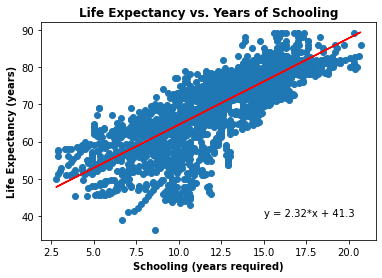

In [18]:
#plot life expectancy vs. schooling
plt.scatter(schooling_df["Schooling"], schooling_df["Life Expectancy"])
plt.title("Life Expectancy vs. Years of Schooling", fontweight="bold")
plt.xlabel("Schooling (years required)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")

#perform regression on life expectancy vs. schooling
(slope, intercept, rvalue, pvalue, stderr) = linregress(schooling_df["Schooling"], schooling_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
regress_values = (schooling_df["Schooling"]*slope) + intercept
plt.plot(schooling_df["Schooling"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq, (15, 40))